<a href="https://colab.research.google.com/github/maxkleiner/maXbox/blob/master/maxnet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_multivar2.txt to data_multivar2.txt


In [3]:
print (uploaded['data_multivar2.txt'][:200].decode('utf-8') + '...')

5.35,4.48,0
6.72,5.37,0
3.57,5.25,0
4.77,7.65,1
2.25,4.07,1
6.08,3.01,1
4.91,5.52,0
5.79,4.09,0
5.03,5.92,0
5.51,7.32,1
3.49,4.08,1
7.32,2.71,1
4.5,4.76,0
5.35,4.94,0
5.18,4.91,0
4.77,9.15,1
2.5,4.35,...


In [4]:
print(type(uploaded))
print(type(files))

<class 'dict'>
<class 'module'>


convert to dataframe
with pandas


I load some machine learning data from a CSV file. The first 2 columns are observations and the remaining column is the target to test a feature predictor.

In [10]:
import pandas as pd
import io

BASEPA = 'C:/maXbox/maxbox3/maxbox3/maXbox3/crypt/viper2/'

df = pd.read_csv(io.StringIO(uploaded['data_multivar2.txt'].decode('utf-8')))
#df = pd.read_csv(BASEPA+'data/data_multivar2.txt') #read data from CSV file
df.columns = ['X1','X2','Y']
df

,X1,X2,Y
0,6.72,5.37,0
1,3.57,5.25,0
2,4.77,7.65,1
3,2.25,4.07,1
4,6.08,3.01,1
...,...,...,...
294,5.24,4.92,0
295,5.14,5.14,0
296,5.28,8.66,1
297,2.68,2.49,1


now make a scatter plot


In [31]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR, SVC 
from sklearn.metrics import mean_squared_error 

df.info()
Datarange = 299

X=df.iloc[:,[0,1]]
y=df['Y']
model = SVR(gamma='auto')  #='scale'
model = SVC(gamma='auto')  #='scale'
print(model)
print(X)

model.fit(X,y)
pred_y = model.predict(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
X1    299 non-null float64
X2    299 non-null float64
Y     299 non-null int64
dtypes: float64(2), int64(1)
memory usage: 7.1 KB
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
       X1    X2
0    6.72  5.37
1    3.57  5.25
2    4.77  7.65
3    2.25  4.07
4    6.08  3.01
..    ...   ...
294  5.24  4.92
295  5.14  5.14
296  5.28  8.66
297  2.68  2.49
298  7.28  2.63

[299 rows x 2 columns]


now the plot and score


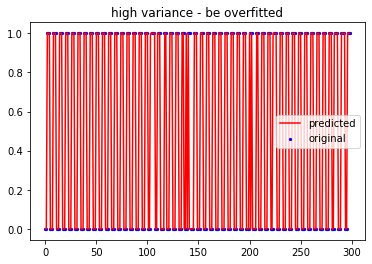

0.959866220735786


In [32]:
x_ax=range(Datarange)
plt.scatter(x_ax, y, s=5, color="blue", label="original")
plt.plot(x_ax, pred_y, lw=1.5, color="red", label="predicted")
plt.title('high variance - be overfitted')
plt.legend()
plt.show() 

score=model.score(X,y)
print(score)

we try to plot the 2 features as feature contribution


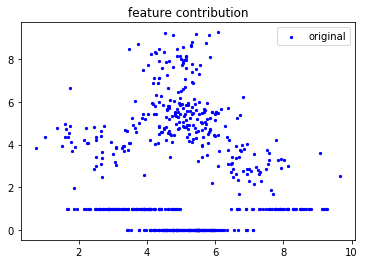

SVM Score: 0.959866220735786


In [33]:
x_ax=range(Datarange)
#print(X)
plt.scatter(df.iloc[:,[0,1]], df.iloc[:,[1,2]], s=5, color="blue", label="original")
#plt.plot(x_ax, y, lw=1.5, color="red", label="predicted")
plt.title('feature contribution')
plt.legend()
plt.show() 

score=model.score(X,y)
print('SVM Score:',score)

In [34]:
# check the performance
from sklearn import datasets, metrics

# if regression: ValueError: Classification metrics can't handle a mix of binary and continuous targets

print(metrics.confusion_matrix(y, pred_y),'\n')
print(metrics.classification_report(y, pred_y),'\n')


[[143   6]
 [  6 144]] 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       149
           1       0.96      0.96      0.96       150

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299
 



now we show the classifier in his discrimination density

149 points belong to zero as blue 
and 150 points to class one as brown


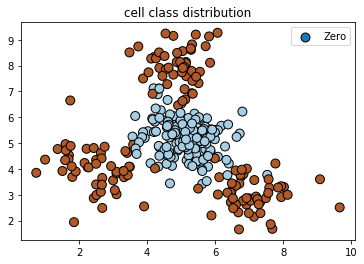

In [35]:
plt.scatter(df.X1, df.X2, c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired, label='Zero')

plt.title('cell class distribution')
plt.legend()
plt.show() 


now we check the prediction to compare visual

we just change c=y to c=pred_y


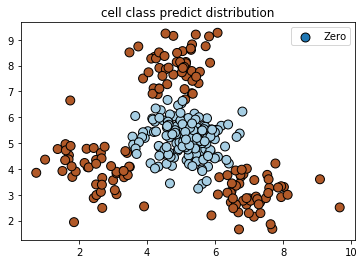

In [36]:
plt.scatter(df.X1, df.X2, c=pred_y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired, label='Zero')

plt.title('cell class predict distribution')
plt.legend()
plt.show() 

next we test a cluster method

To create a K-means cluster with two clusters, simply type the following script:

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Now let's see what centroid values the algorithm generated for the final clusters. 


In [51]:
print(kmeans.cluster_centers_)

#The output is a one dimensional array of 299 elements corresponding to the clusters assigned to our data points.

print(kmeans.labels_)

[[4.41357143 5.66839286]
 [6.6492     3.42373333]]
[1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 1]


Let's plot the data points again on the graph and visualize how the data has been clustered.

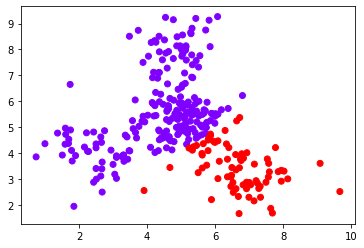

In [52]:
#plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(df.X1,df.X2, c=kmeans.labels_, cmap='rainbow')


as we now lets try with 4 clusters:

[[4.86259259 7.92444444]
 [5.10820144 5.19359712]
 [2.54156863 4.04607843]
 [7.00163636 3.09672727]]


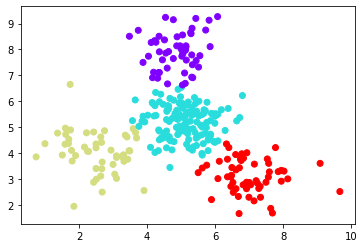

In [54]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X)
print(kmeans4.cluster_centers_)
plt.scatter(df.X1,df.X2, c=kmeans4.labels_, cmap='rainbow')

Now let's plot the points along with the centroid coordinates of each 

cluster to see how the centroid positions effects clustering. 

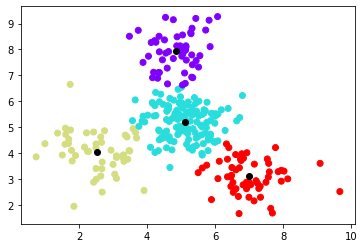

In [58]:
import numpy as np
X = np.array(X)
plt.scatter(X[:,0], X[:,1], c=kmeans4.labels_, cmap='rainbow')
plt.scatter(kmeans4.cluster_centers_[:,0] ,kmeans4.cluster_centers_[:,1], color='black')